In [31]:
## Plotting phase information from thermocalc software
import os
import numpy as np
import pandas as pd
import pymatgen as mg
from pymatgen.core.composition import Composition
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Tick parameters
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['legend.fontsize'] = 15

def read_phase_file(filename):
    xls = pd.ExcelFile(filename)
    Data_DF1 = pd.read_excel(xls, 'VolFrac')
    Data_DF2 = pd.read_excel(xls, 'Composition of a Phase')
    return Data_DF1, Data_DF2

def get_composition_df(formula):
    comp = Composition(formula)
    weights = [round(comp.get_atomic_fraction(ele), 3) for ele in comp.elements]
    elements = [str(x) for x in comp.elements]
    df = pd.DataFrame([weights], columns=elements)
    return df

if __name__=="__main__":
    
    datafile_path = './'
    filename = datafile_path+'phase_diagrams/FeMoSi.xlsx'
    phase_vol_frac, phase_composition = read_phase_file(filename)
    phase_vol_frac['Temperature'] = phase_vol_frac['Temperature'] + 273.0
    phase_vol_frac['Temperature_1'] = phase_vol_frac['Temperature_1'] + 273.0
    phase_vol_frac['Temperature_2'] = phase_vol_frac['Temperature_2'] + 273.0
    
    fig = plt.figure(figsize=(5,4))
    ax1 = fig.add_subplot(111)
    plt.plot(phase_vol_frac['Temperature'],phase_vol_frac['BCC_B2-2'],'-b',label='FeSi BCC B2')
    plt.plot(phase_vol_frac['Temperature_1'],phase_vol_frac['W5SI3_D8M'],'-r',label='Mo$_5$Si$_3$ D8m')
    plt.plot(phase_vol_frac['Temperature_2'],phase_vol_frac['LIQUID'],'-g',label='Liquid')
    plt.xlabel('Temperature [K]')
    plt.ylabel('Volume Fraction')
    plt.legend()
    plt.xlim([773,2250])
    plt.ylim([-0.02,1.1])

    # plt.show()
    plt.tight_layout()
    fig.patch.set_facecolor('white')
    plt.savefig('plots/FeMoSi_phase_vol_fraction.pdf', bbox_inches='tight')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
phase_composition

,Temperature [°C],FE in BCC_B2#2,Temperature [°C] [1],MO in BCC_B2#2,Temperature [°C] [2],SI in BCC_B2#2,Temperature [°C] [3],FE in W5SI3_D8M,Temperature [°C] [4],MO in W5SI3_D8M,Temperature [°C] [5],SI in W5SI3_D8M,Temperature [°C] [6],FE in LIQUID,Temperature [°C] [7],MO in LIQUID,Temperature [°C] [8],SI in LIQUID
0,500.0,0.78338,500.0,0.00015,500.0,0.21647,500.00000,8.209220e-09,500.00000,0.61437,500.00000,0.38563,1170.53952,0.67839,1170.53952,0.07921,1170.53952,0.24239
1,510.0,0.78334,510.0,0.00017,510.0,0.21649,510.00000,8.914870e-09,510.00000,0.61437,510.00000,0.38563,1171.61085,0.67989,1171.61085,0.08314,1171.61085,0.23697
2,520.0,0.78329,520.0,0.00019,520.0,0.21652,520.00000,9.643040e-09,520.00000,0.61439,520.00000,0.38561,1171.61085,0.67989,1171.61085,0.08314,1171.61085,0.23697
3,530.0,0.78323,530.0,0.00022,530.0,0.21655,530.00000,1.039050e-08,530.00000,0.61440,530.00000,0.38560,1171.61085,0.67989,1171.61085,0.08314,1171.61085,0.23697
4,540.0,0.78315,540.0,0.00025,540.0,0.21659,540.00000,1.115370e-08,540.00000,0.61442,540.00000,0.38558,1174.00000,0.67917,1174.00000,0.08370,1174.00000,0.23712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,NaN,NaN,NaN,NaN,NaN,NaN,1824.00000,1.717800e-08,1824.00000,0.61051,1824.00000,0.38949,NaN,NaN,NaN,NaN,NaN,NaN
375,NaN,NaN,NaN,NaN,NaN,NaN,1834.00000,1.659340e-08,1834.00000,0.61051,1834.00000,0.38949,NaN,NaN,NaN,NaN,NaN,NaN
376,NaN,NaN,NaN,NaN,NaN,NaN,1844.00000,1.600760e-08,1844.00000,0.61051,1844.00000,0.38949,NaN,NaN,NaN,NaN,NaN,NaN
377,NaN,NaN,NaN,NaN,NaN,NaN,1854.00000,1.542050e-08,1854.00000,0.61052,1854.00000,0.38948,NaN,NaN,NaN,NaN,NaN,NaN


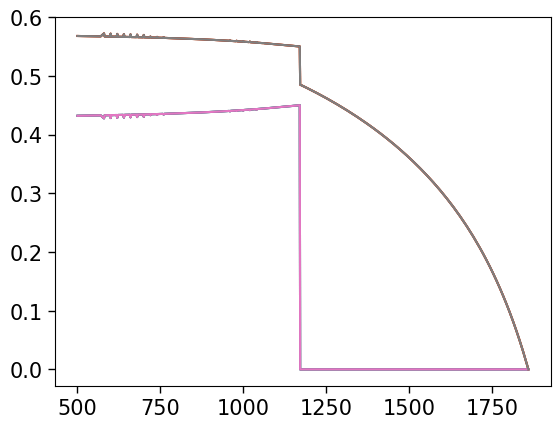